In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sun Jan 15 01:40:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/lab4/ex2'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/lab4/ex2
lab4_ex2.cu


In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!./lab4_ex2 131070

The input length is 131070.
Time Data copy (H2D + D2H) and CUDA kernel: 0.000279.
CPU and GPU results are equal.


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab4_ex2 131070

The input length is 131070.
==PROF== Connected to process 2772 (/content/drive/MyDrive/lab4/ex2/lab4_ex2)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 2: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 3: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 4: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 5: 0%....50%....100% - 8 passes
Time Data copy (H2D + D2H) and CUDA kernel: 2.458522.
CPU and GPU results are equal.
==PROF== Disconnected from process 2772
[2772] lab4_ex2@127.0.0.1
  vecAdd(double*, double*, double*, int, int), 2023-Jan-15 01:49:59, Context 1, Stream 13
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.90
    SM Frequency                                                   

In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!nvprof ./lab4_ex2 2097152

The input length is 2097152.
==3035== NVPROF is profiling process 3035, command: ./lab4_ex2 2097152
Time Data copy (H2D + D2H) and CUDA kernel: 0.003493.
CPU and GPU results are equal.
==3035== Profiling application: ./lab4_ex2 2097152
==3035== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   61.77%  3.0217ms         8  377.71us  354.43us  408.12us  [CUDA memcpy HtoD]
                   32.33%  1.5812ms         4  395.30us  320.41us  424.76us  [CUDA memcpy DtoH]
                    5.90%  288.60us         4  72.150us  68.446us  74.911us  vecAdd(double*, double*, double*, int, int)
      API calls:   93.73%  248.69ms         4  62.174ms  6.5498ms  227.96ms  cudaHostAlloc
                    3.94%  10.452ms         4  2.6130ms  2.4668ms  3.0169ms  cudaFreeHost
                    1.25%  3.3272ms         1  3.3272ms  3.3272ms  3.3272ms  cudaDeviceSynchronize
                    0.62%  1.6369ms         3  545.62us  179.8

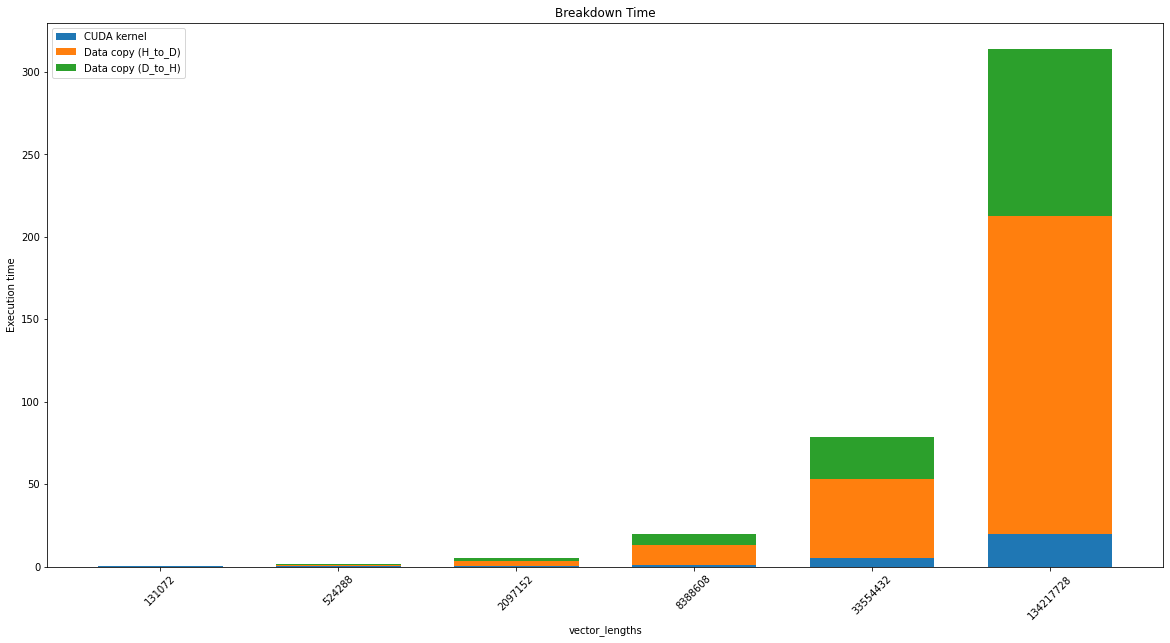

In [1]:
import matplotlib.pyplot as plt
import numpy as np

vector_lengths = ['131072', '524288', '2097152', '8388608', '33554432', '134217728']
datacpy_h2d = np.array([224.60*10**(-3), 781.75*10**(-3), 3.0231,          12.071, 48.373, 192.85])
datacpy_d2h = np.array([113.21*10**(-3), 391.55*10**(-3), 1.5828,          6.3170, 25.300, 101.28])
cuda_kernel = np.array([38.720*10**(-3), 75.646*10**(-3), 290.81*10**(-3), 1.2167, 4.9207, 19.861])

width = 0.7
fig, ax = plt.subplots(1)

ax.bar(vector_lengths, cuda_kernel, width, label='CUDA kernel')
ax.bar(vector_lengths, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H_to_D)')
ax.bar(vector_lengths, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D_to_H)')

ax.set_xlabel('vector_lengths')
ax.set_ylabel('Execution time')
ax.set_title('Breakdown Time')
ax.legend()



for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.set_size_inches(20, 10, forward=True)
plt.show()

In [ ]:
!nvprof --output-profile hw4_ex2_stream_1 -f ./lab4_ex2 8388608

The input length is 8388608.
==4614== NVPROF is profiling process 4614, command: ./lab4_ex2 8388608
Time Data copy (H2D + D2H) and CUDA kernel: 0.013746.
CPU and GPU results are equal.
==4614== Generated result file: /content/drive/MyDrive/lab4/ex2/hw4_ex2_stream_1


In [ ]:
!nvcc -arch=sm_75 ./lab4_ex2.cu -o lab4_ex2
!nvprof ./lab4_ex2 8388608

The input length is 8388608.
==4868== NVPROF is profiling process 4868, command: ./lab4_ex2 8388608
Time Data copy (H2D + D2H) and CUDA kernel: 0.013776.
CPU and GPU results are equal.
==4868== Profiling application: ./lab4_ex2 8388608
==4868== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   61.62%  12.110ms         8  1.5137ms  1.4119ms  1.6723ms  [CUDA memcpy HtoD]
                   32.23%  6.3341ms         4  1.5835ms  1.2754ms  1.7049ms  [CUDA memcpy DtoH]
                    6.15%  1.2078ms         4  301.95us  293.63us  305.56us  vecAdd(double*, double*, double*, int, int)
      API calls:   84.64%  327.78ms         4  81.946ms  26.439ms  246.00ms  cudaHostAlloc
                   10.79%  41.802ms         4  10.450ms  9.5171ms  11.975ms  cudaFreeHost
                    3.51%  13.595ms         1  13.595ms  13.595ms  13.595ms  cudaDeviceSynchronize
                    0.63%  2.4525ms         3  817.51us  262.0

In [ ]:
!nvprof --output-profile hw4_ex2_stream_4.nvvp ./lab4_ex2 44440000 11110000

The input length is 44440000.
==7605== NVPROF is profiling process 7605, command: ./lab4_ex2 44440000 11110000
Time Data copy (H2D + D2H) and CUDA kernel: 0.072334.
CPU and GPU results are equal.
==7605== Generated result file: /content/drive/MyDrive/lab4/ex2/hw4_ex2_stream_4.nvvp


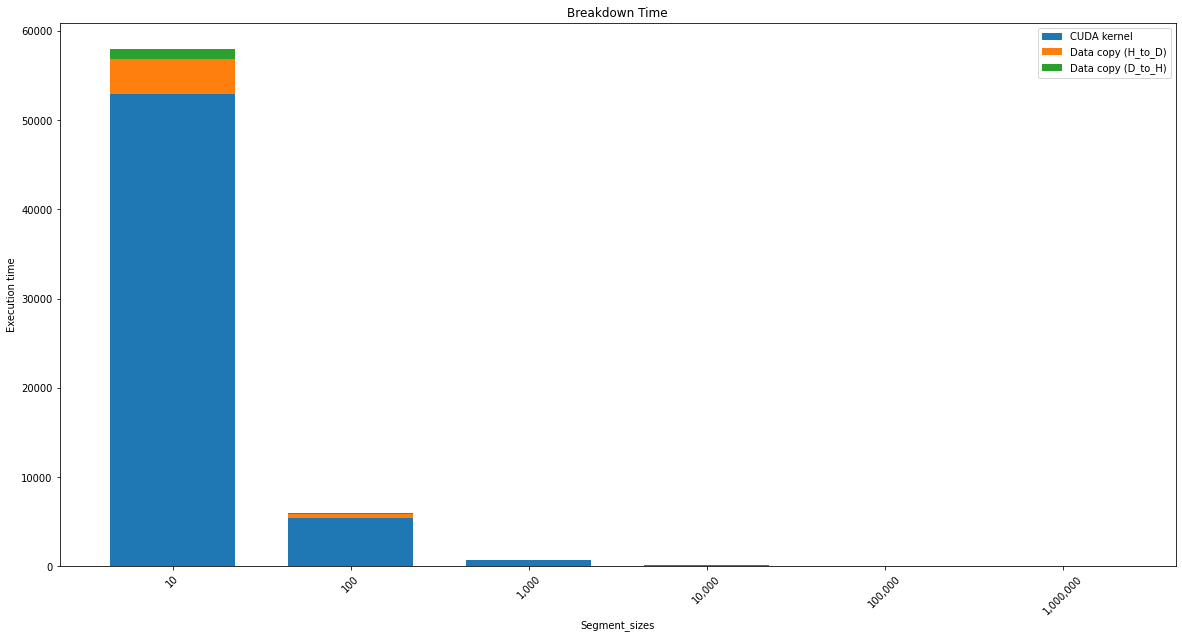

In [2]:
import matplotlib.pyplot as plt
import numpy as np

segment_sizes = ['10', '100', '1,000', '10,000', '100,000', '1,000,000']
datacpy_d2h = np.array([1.21222*10**(3),          126.25, 16.080, 6.9546, 7.2589, 6.8279])
datacpy_h2d = np.array([3.82977*10**(3),          399.29, 52.769, 17.569, 13.682, 12.952])
cuda_kernel = np.array([52.9683*10**(3), 5.43207*10**(3), 670.95, 127.43, 13.120, 1.9356])
width = 0.7
fig, ax = plt.subplots(1)

ax.bar(segment_sizes, cuda_kernel, width, label='CUDA kernel')
ax.bar(segment_sizes, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H_to_D)')
ax.bar(segment_sizes, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D_to_H)')

ax.set_xlabel('Segment_sizes')
ax.set_ylabel('Execution time')
ax.set_title('Breakdown Time')
ax.legend()



for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.set_size_inches(20, 10, forward=True)
plt.show()